<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/sep30-31/emcee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install emcee


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.4 MB/s eta 0:00:00


Valor estimado de w0: 1.9479591252412707
Valor estimado de w1: 0.004307249183763202


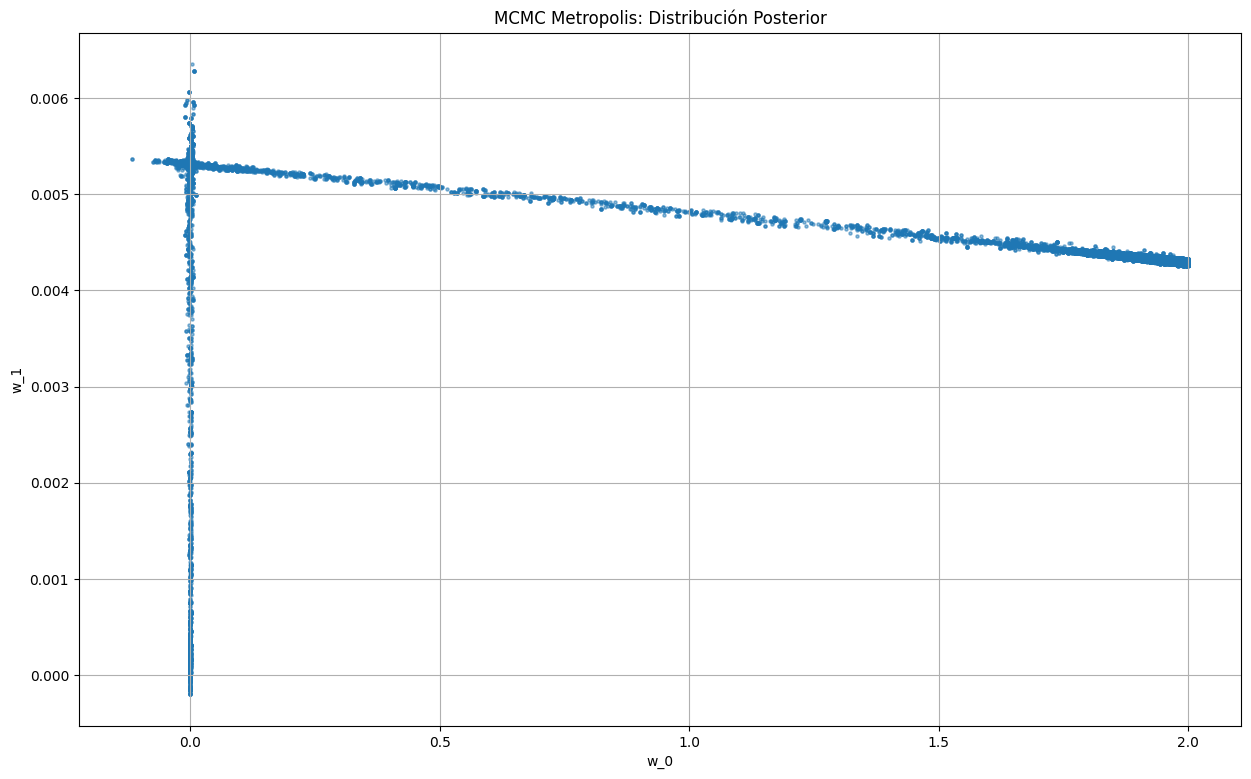

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import emcee

# Establecer la semilla para datos de random
np.random.seed(42)

# Datos de las carreras olímpicas de 100 metros
data = np.loadtxt("/content/olympic100m_men.txt",delimiter = ",").T
x=data[0]
y=data[1]

# Función del modelo
def model(theta, x):
    w_0, w_1 = theta
    return w_0 + w_1 * x

# Función de verosimilitud
def log_likelihood(theta, x, y):
    sigma_i = 0.1
    error = y - model(theta, x)
    return -np.sum(error ** 2 / (2 * sigma_i ** 2))

# Función de prior
def log_prior(theta):
    theta_min = [-2, -2]  # Define los límites para los parámetros
    theta_max = [2, 2]
    if all(theta_min <= theta) and all(theta <= theta_max):
        return 0  # Prior plano dentro del rango
    else:
        return -np.inf  # Prior 0 fuera del rango

# Función de posterior
def log_posterior(theta, x, y):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y)

# Número de muestras a generar
n_samples = 10000

theta_ini = np.array([0, 0])    #parametros iniciales para la variable thera_ini

nwalkers = 50
ndim = len(theta_ini)
p0 = [theta_ini + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y))
sampler.run_mcmc(p0, n_samples)

samples = sampler.chain[:, :, :].reshape((-1, ndim))

# Calcular los valores medios estimados de w0 y w1
w0_estimado = np.mean(samples[:, 0])
w1_estimado = np.mean(samples[:, 1])

print("Valor estimado de w0:", w0_estimado)
print("Valor estimado de w1:", w1_estimado)

# Visualización de los resultados
plt.figure(figsize=(15, 9))
plt.scatter(samples[:, 0], samples[:, 1], s=5, alpha=0.5)
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.title('MCMC Metropolis: Distribución Posterior')
plt.grid(True)
plt.show()
